In [1]:
from environment import State, Environment
from environment import DEFAULT_START_ST, DEFAULT_GOAL_ST, SIMPLE_CONFIG
from lazy_rrg import LazyRRGPlanner
from prm import PRMStar

import random
import json

import numpy as  np


SEED=42
random.seed(SEED)
np.random.seed(SEED)

### Environment Configuration

In [2]:
start_state = State(*DEFAULT_START_ST)
goal_state = State(*DEFAULT_GOAL_ST)
env = Environment.from_config(start_state, SIMPLE_CONFIG)

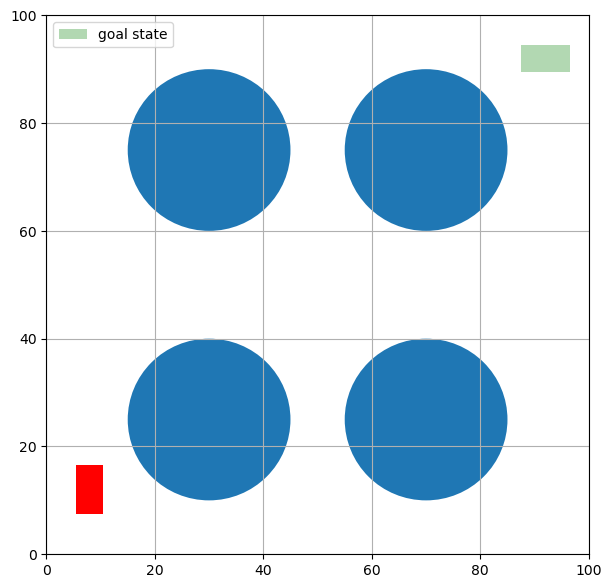

In [3]:
env.render(goal_state=State(*DEFAULT_GOAL_ST))

## Planning algorithm experiments

In [ ]:
def uniform_sampler(env_shape, n=1):
    return np.random.uniform(
        low=np.zeros(shape=len(env_shape)),
        high=env_shape,
        size=(n,)
    )

planners = {
    "lazy-rrg-star": LazyRRGPlanner(env, np.linalg.norm, uniform_sampler)
}

In [ ]:
def run_planning_experiment(planner, env, start_state, goal_state):
    ...

In [ ]:
experiment_logs = {}
for planner_name, planner in planners.items():
    stats = run_planning_experiment(planner, env, start_state, goal_state)
    experiment_logs[planner_name] = stats

# write all the logs into file
with open('eperiment_logs.json', 'rb') as f:
    json.dump(experiment_logs, f)

# Experiment with PRM

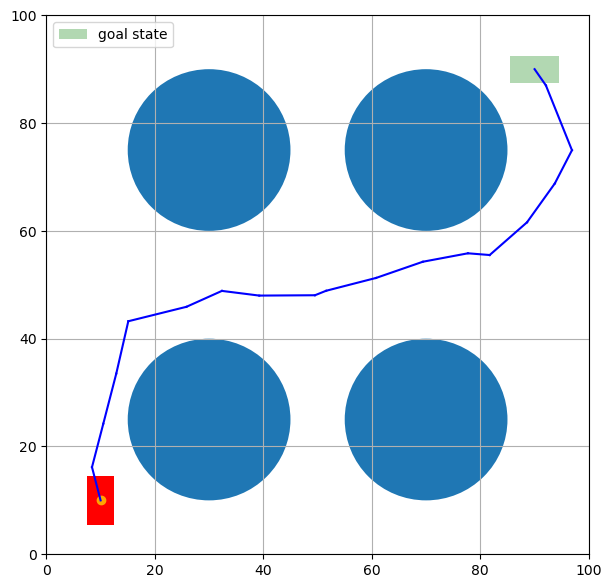

In [2]:
env = Environment.from_config(State(*DEFAULT_START_ST), SIMPLE_CONFIG)
prm_star = PRMStar(env, num_samples=500, k=15)

start_state = State(*DEFAULT_START_ST)
goal_state = State(*DEFAULT_GOAL_ST)
prm_star.build_roadmap(start_state, goal_state)

path = prm_star.find_path(start_state, goal_state)

# Visualization
prm_star.render(path)